Alumno: Luciano Benjamin Recalde Carballo
# Examen Machine Learning

## Carga de datos

In [44]:
import pandas as pd
ds_path = "data/winequality-red.csv"
df_red = pd.read_csv(ds_path, sep = ';')
ds_path = "data/winequality-white.csv"
df_white = pd.read_csv(ds_path, sep = ';')
df_red = df_red.assign(type='red') 
df_white = df_white.assign(type='white')
df = pd.concat([df_red, df_white])

Cargamos los datos en 2 dataframes diferentes, para vinos blancos y para vinos tintos. Utilizamos como separadores los caracteres ";" ya que se observa en los datasets que estos son utilizados.

Luego asignamos una columna llamada categoria a cada dataframe para usarlo como variable categorica y asi poder trabajar con un dataframe que contenga a ambos (Con el fin de agilizar ciertos procesos)

A continuacion visualizaremos la cabecera

In [45]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


## Limpieza de datos

### Identificación y eliminación de valores duplicados

Buscamos valores duplicados en los dataframes.

In [46]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")


Registros duplicados en df: 1177


Observamos que existen valores duplicados en el df. Procederemos a eliminarlos y volvemos a buscar duplicados.

In [47]:
df = df.drop_duplicates()
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


Se observa que ya no quedan duplicados en el df.

### Estadisticas descriptivas del Dataframe para vinos tintos

In [48]:
print(df.query('type == "red"').describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000         

### Estadisticas descriptivas del Dataframe para vinos blancos

In [49]:
print(df.query('type == "white"').describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000         

### Verificación y ajuste de tipos de datos:

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  type                  5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 581.9+ KB


Observamos que todas las columnas corresponden al tipo de dato, exceptuando la columna que hemos creado para diferenciar el tipo de vino "type". Procedemos a asignar el tipo de dato adecuado.

In [51]:
df["type"] = df["type"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         5320 non-null   float64 
 1   volatile acidity      5320 non-null   float64 
 2   citric acid           5320 non-null   float64 
 3   residual sugar        5320 non-null   float64 
 4   chlorides             5320 non-null   float64 
 5   free sulfur dioxide   5320 non-null   float64 
 6   total sulfur dioxide  5320 non-null   float64 
 7   density               5320 non-null   float64 
 8   pH                    5320 non-null   float64 
 9   sulphates             5320 non-null   float64 
 10  alcohol               5320 non-null   float64 
 11  quality               5320 non-null   int64   
 12  type                  5320 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 545.6 KB


### Corrección de inconsistencias en valores categóricos
Se observan que las columnas corresponden plenamente al tipo de datos y las unicas columnas categoricas son las de quality (calidad de vino) y la creada por nosotros mismos para unificar los dataframes y trabajar de forma mas comoda. 
Por el momento no convertimos la columna quality al tipo categorica, ya que lo utilizaremos para generar una clasificacion del vino mas adelante

In [52]:
from utils import get_categoric_columns
get_categoric_columns(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         5320 non-null   float64 
 1   volatile acidity      5320 non-null   float64 
 2   citric acid           5320 non-null   float64 
 3   residual sugar        5320 non-null   float64 
 4   chlorides             5320 non-null   float64 
 5   free sulfur dioxide   5320 non-null   float64 
 6   total sulfur dioxide  5320 non-null   float64 
 7   density               5320 non-null   float64 
 8   pH                    5320 non-null   float64 
 9   sulphates             5320 non-null   float64 
 10  alcohol               5320 non-null   float64 
 11  quality               5320 non-null   int64   
 12  type                  5320 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 545.6 KB


### Manejo de valores faltantes adecuadamente

Inicialmente buscamos valores nulos en el df

In [53]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

No existen valores nulos en el dataframe

## Exploracion de datos

### Visualizaciones univariadas y multivariadas

Iniciamos creando unos boxplots para visualizar los datos

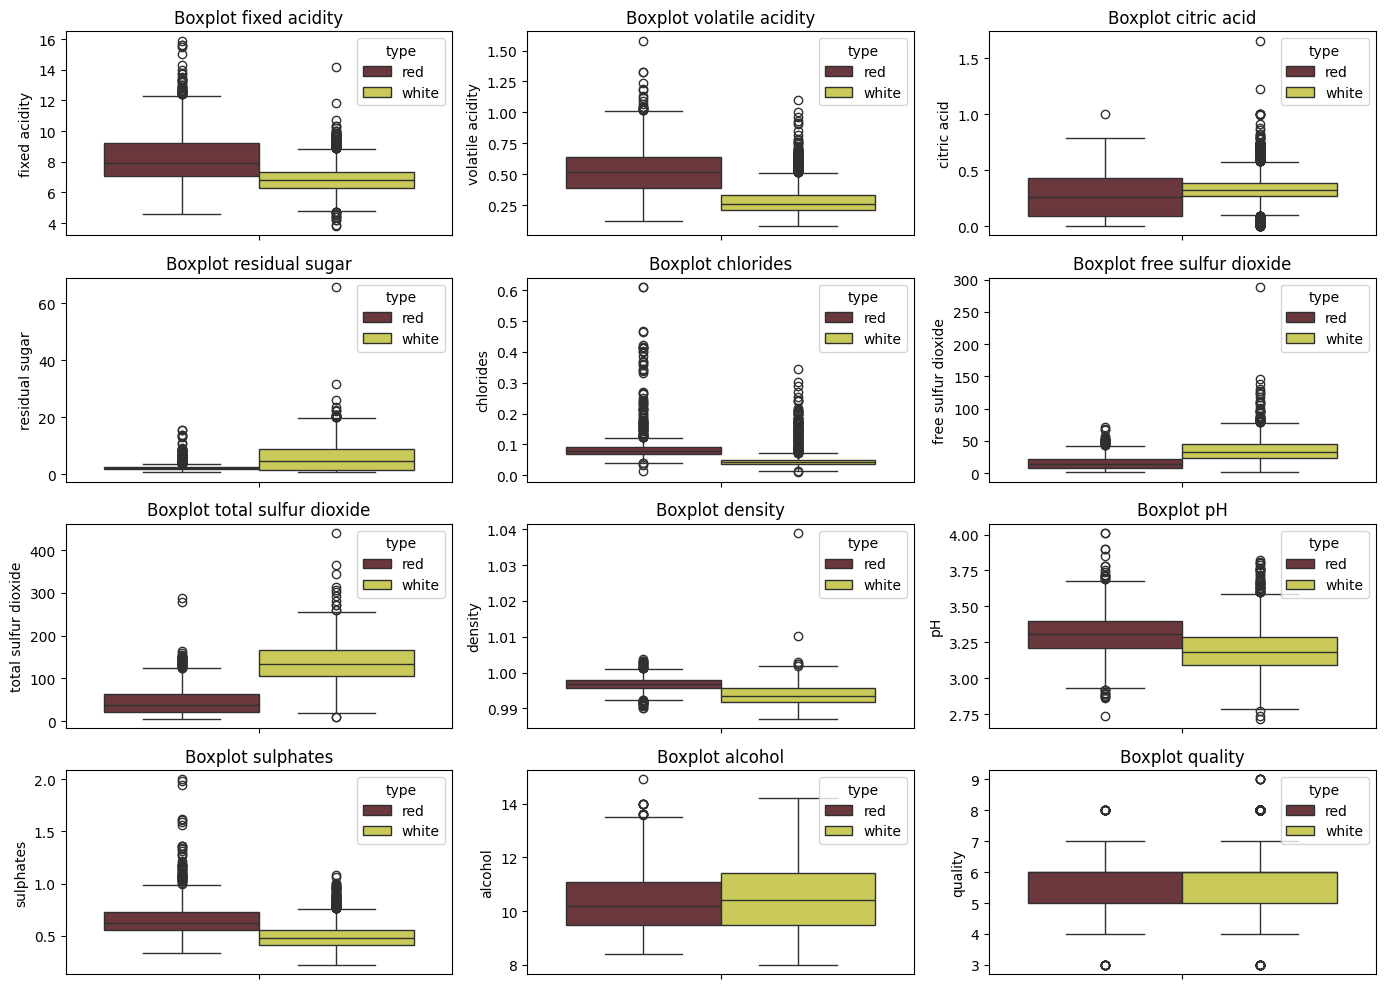

In [54]:
from utils import boxplot_graph_multi_elements, get_numeric_columns
boxplot_graph_multi_elements(df, get_numeric_columns(df))

Se observan outliers en varias columnas de ambos tipos de vinos, pero al tratarse de valores posibles y aceptables, no se modifican.

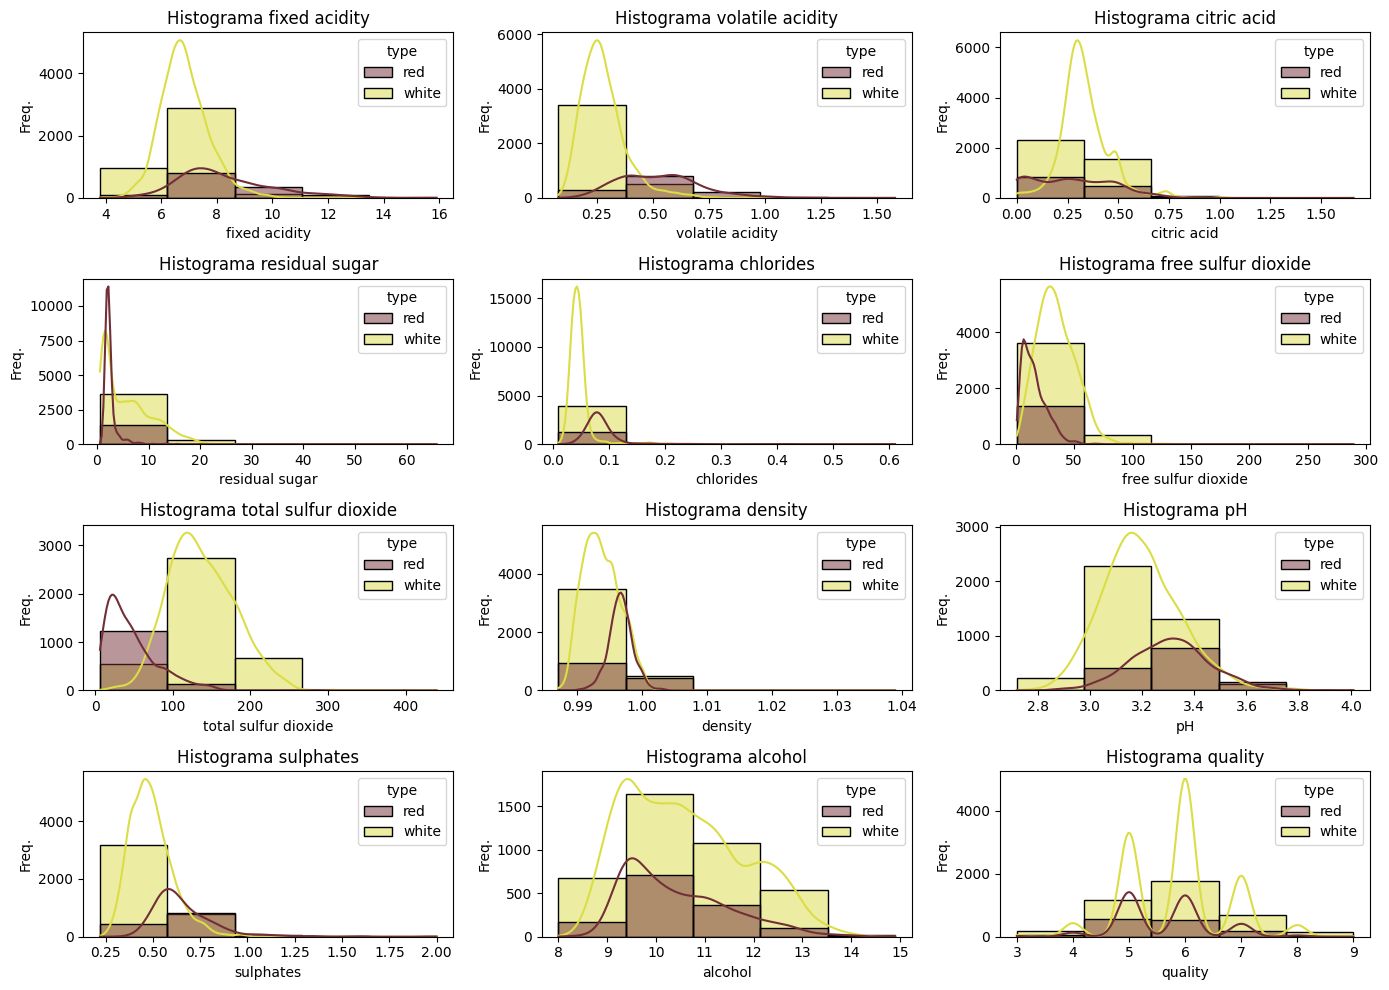

In [55]:
from utils import graph_histogram, get_numeric_columns
graph_histogram(df, get_numeric_columns(df), kde=True)

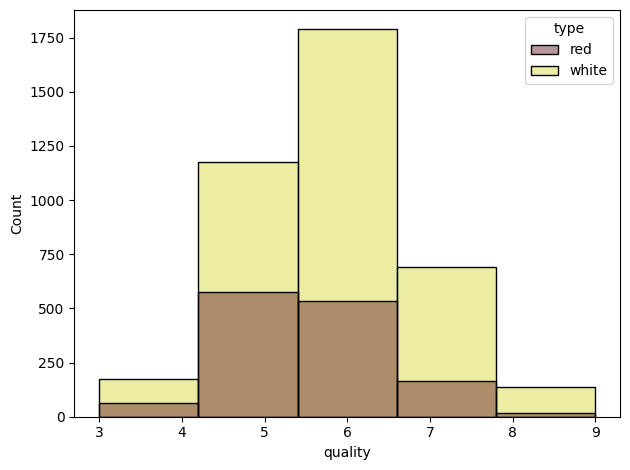

In [56]:
from utils import graph_comparison_histogram
graph_comparison_histogram(df, column='quality')

Observando la distribucion de ambos tipos de vinos, vemos que ambos son bastante cercanos a una distribucion normal

Creamos una columna para clasificar la calidad del vino con una variable categorica mas util.

In [ ]:
df['quality_abs'] = ""
df.loc[df['quality'] > 6, 'quality_abs'] = 'good'
df.loc[df['quality'] <= 6, 'quality_abs'] = 'medium'
df.loc[df['quality'] <= 4, 'quality_abs'] = 'bad'
df["quality"] = df["quality"].astype('category')
df["quality_abs"] = df["quality_abs"].astype('category')

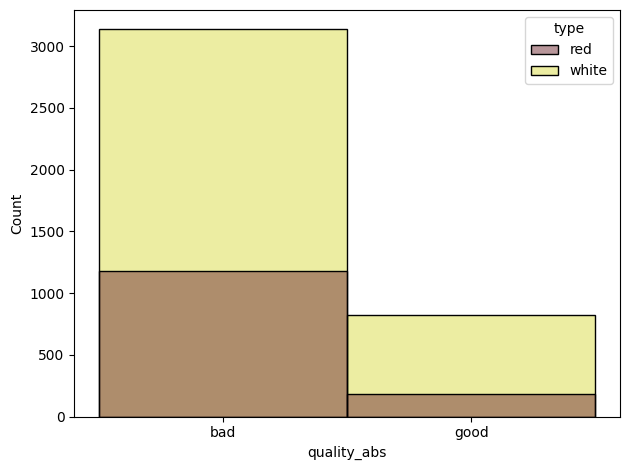

In [58]:
graph_comparison_histogram(df, column='quality_abs')

Observamos que existe una gran diferencia entre la cantidad de vinos malos y la cantidad de vinos buenos

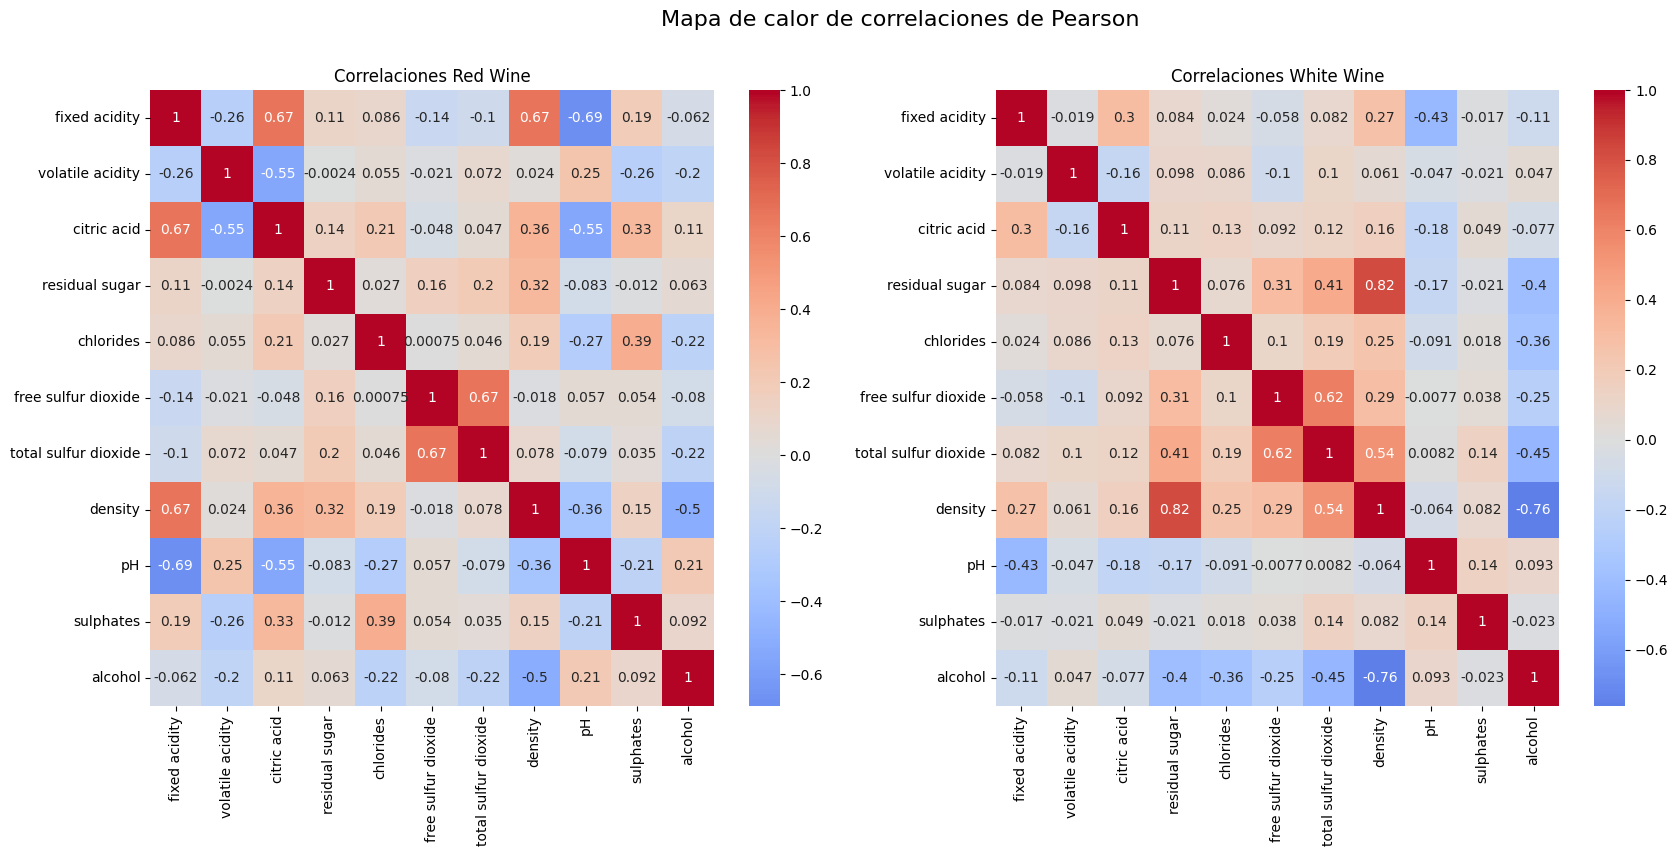

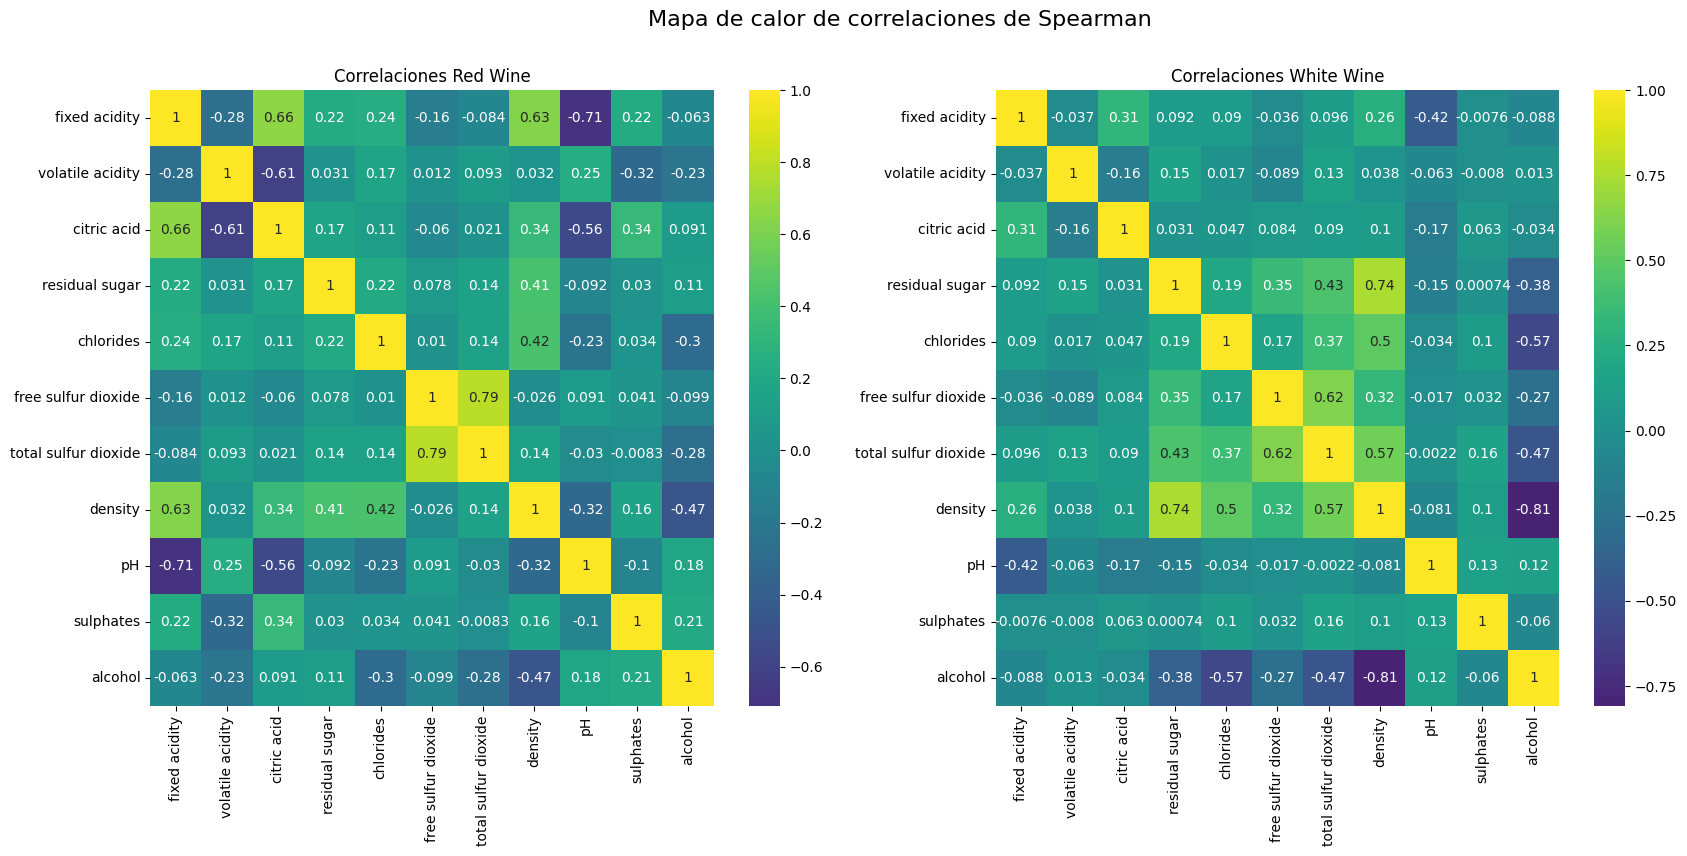

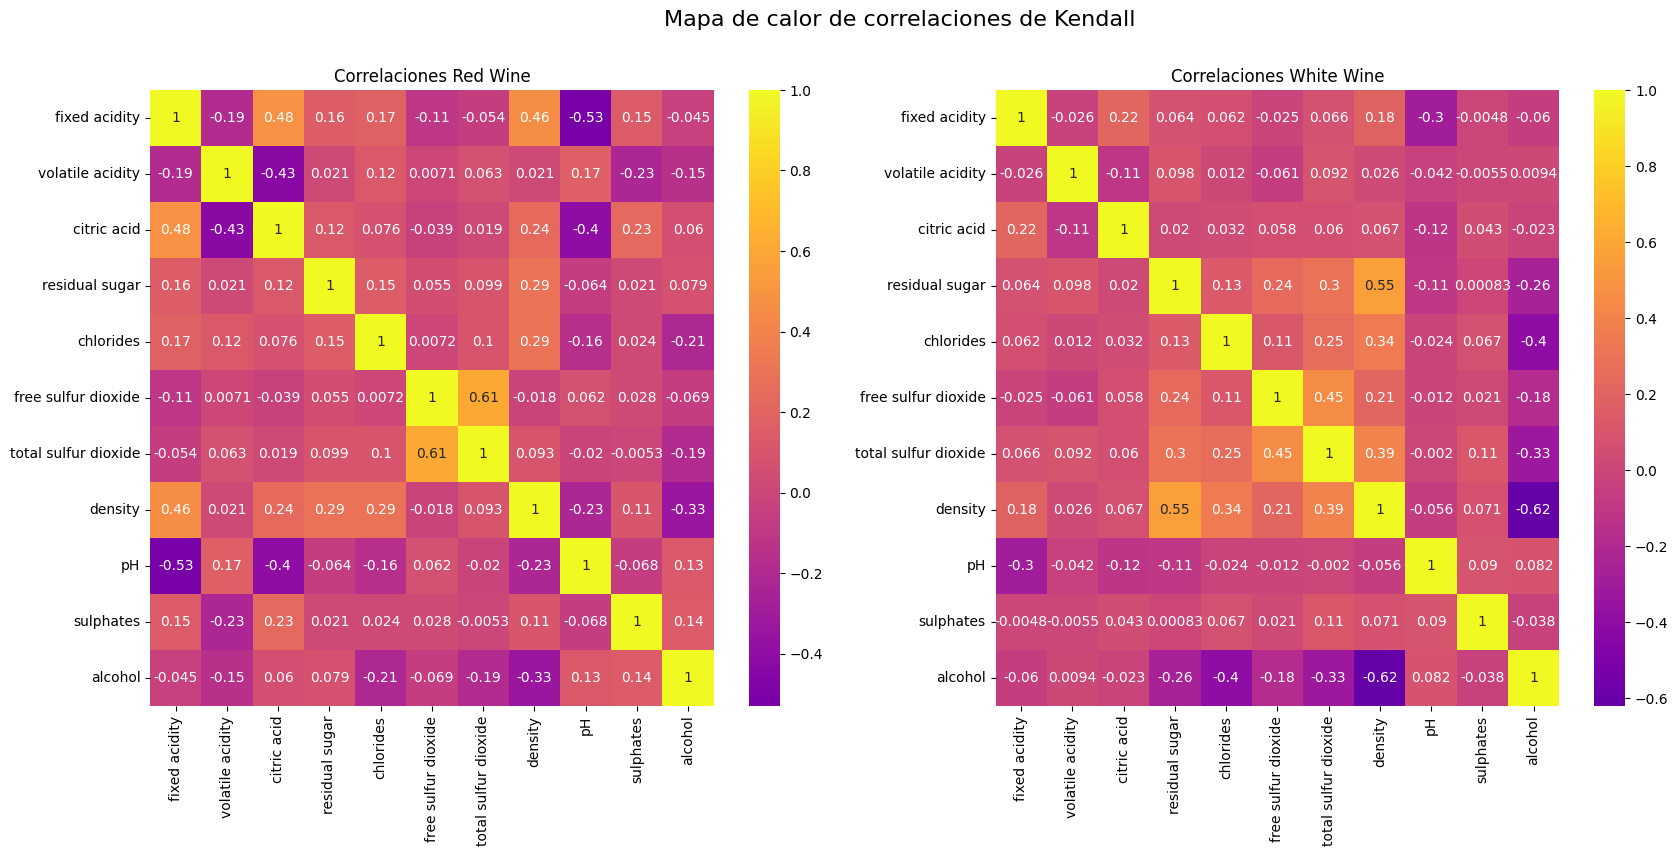

In [59]:
from utils import graph_correlations
# Calcular las correlaciones
df_white = df.query("type == 'white'")
df_red = df.query("type == 'red'")
correlation_matrix_red = df_red[get_numeric_columns(df)].corr(method='pearson')
correlation_matrix_white = df_white[get_numeric_columns(df)].corr(method='pearson')
spearman_corr_red = df_red[get_numeric_columns(df)].corr(method='spearman')
spearman_corr_white = df_white[get_numeric_columns(df)].corr(method='spearman')
kendall_corr_red = df_red[get_numeric_columns(df)].corr(method='kendall')
kendall_corr_white = df_white[get_numeric_columns(df)].corr(method='kendall')
graph_correlations(correlation_matrix_red, correlation_matrix_white, title="Mapa de calor de correlaciones de Pearson", cmap="coolwarm")
graph_correlations(spearman_corr_red, spearman_corr_white, title="Mapa de calor de correlaciones de Spearman", cmap="viridis")
graph_correlations(kendall_corr_red, kendall_corr_white, title="Mapa de calor de correlaciones de Kendall", cmap="plasma")


Segun observamos en los mapas de correlacion de los diferentes vinos, existe similitudes para algunas variables en cuanto a ciertos valores (Por ejemplo: Alcohol-Calidad / Sulfato-Calidad).
Pero en cuanto a otras variables no existe una similitud entre la correlacion de las columnas. Por lo tanto crearemos modelos separados para cada tipo de vino.

## Implementacion de modelos

### Preprocesamiento de datos

Trabajaremos con ambos tipos de vinos por separado, ya que las caracteristicas de calidad de ambos tipos de vinos difieren, como se pudo observar mas arriba.

A continuacion agrupamos por calidad y enumeramos.

In [60]:
df_red.groupby("quality_abs", observed=False).count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
quality_abs,,,,,,,,,,,,,
bad,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175
good,184,184,184,184,184,184,184,184,184,184,184,184,184


Almacenamos de acuerdo a la calidad de vino tinto.

In [ ]:
good_red = df_red[df_red.quality_abs=='good']
medium_red = df_red[df_red.quality_abs=='medium']
bad_red = df_red[df_red.quality_abs=='bad']
    

Para el vino tinto. Utilizaremos el conteo 1175, ya que es el de mayor frecuencia, para las clases de quality_abs. Antes de continuar, haremos lo mismo para el vino blanco

In [62]:
df_white.groupby("quality_abs",observed=False).count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
quality_abs,,,,,,,,,,,,,
bad,3136,3136,3136,3136,3136,3136,3136,3136,3136,3136,3136,3136,3136
good,825,825,825,825,825,825,825,825,825,825,825,825,825


In [ ]:
good_white = df_white[df_white.quality_abs=='good']
medium_white = df_white[df_white.quality_abs=='medium']
bad_white = df_white[df_white.quality_abs=='bad']

En el caso del vino blanco tenemos categorizado por bueno y malo, por lo tanto marginamos en esos 2 valores. Para este tipo de vino utilizaremos el conteo de 3136, que corresponde a los vinos malos.

A continuacion haremos el resampleado y combinado de nuestros datos, primeramente para vino tinto y luego para vino blanco

In [64]:
from sklearn.utils import resample

# Resampleamos para arriba las clases que están en la minoría. Vino tinto
good_red_upsampled = resample(good_red, replace=True, n_samples=1175, random_state=12) 

# Resampleamos para arriba las clases que están en la minoría. Vino blanco
good_white_upsampled = resample(good_white, replace=True, n_samples=3136, random_state=12) 


Ahora seguimos con la combinacion de clases mayoritarias submuestreadas con las clases minoritarias sobremuestreadas. Para ambos tipos de vinos.

In [65]:
# Combinamos nuestra  clase mayoritaria submuestreada con la clase minoritaria sobremuestreada. Para vino tinto
balanced_df_red = pd.concat([good_red_upsampled, bad_red]).reset_index(drop=True)
# Combinamos nuestra  clase mayoritaria submuestreada con la clase minoritaria sobremuestreada. Para vino blanco
balanced_df_white = pd.concat([good_white_upsampled, bad_white]).reset_index(drop=True)
# Display new class counts
print("Vino tinto")
print(balanced_df_red.quality_abs.value_counts())
print("\nVino blanco")
print(balanced_df_white.quality_abs.value_counts())

Vino tinto
quality_abs
bad     1175
good    1175
Name: count, dtype: int64

Vino blanco
quality_abs
bad     3136
good    3136
Name: count, dtype: int64


Ahora obtenemos las columnas numericas para la prediccion.

In [66]:
numeric_columns= get_numeric_columns(df)
numeric_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

No utilizaremos la columna quality, ya que es la columna que es categorica

In [67]:
numeric_columns_predict = [
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
]

output = "quality_abs"

X_red = balanced_df_red[[*numeric_columns_predict]]
y_red = balanced_df_red[output]

X_white = balanced_df_white[[*numeric_columns_predict]]
y_white = balanced_df_white[output]

Tenemos todos los datos listos para el entrenamiento del modelo. A continuacion realizamos el escalamiento de caracteristicas para ambos tipos de vinos. Utilizaremos el 30% de nuestros datos para las pruebas y 70% para el entrenamiento.

In [68]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
    X_red,
    y_red,
    test_size=0.3,
    random_state=0,
)

X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(
    X_white,
    y_white,
    test_size=0.3,
    random_state=0,
) 

scaler = RobustScaler()
X_train_red = scaler.fit_transform(X_train_red)
X_test_red = scaler.transform(X_test_red)
X_train_white = scaler.fit_transform(X_train_white)
X_test_white = scaler.transform(X_test_white)

Utilizamos el RobustScaler ya que en las graficas se pudieron observar gran numero de outliers.
Con las caracteristicas escaladas, podemos proceder a entrenar los modelos de clasificacion.

### Modelos de clasificacion

#### Entrenamiento de modelos de clasificacion

##### Regresion Logistica

Definimos nuestro modelo de Regresion logistica, al utilizar el RobustScaler, con la configuracion actual, nos pide que aumentemos el parametro max_iter o que reescalemos la muestra. Por lo tanto se utiliza 150 como valor de max_iter

Iniciamos con el modelo para vino tinto

In [69]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de Regresión Logística con hiperparámetros específicos
lr_red = LogisticRegression(
    penalty='l2',           # Tipo de regularización L2 (Ridge)
    C=1.0,                   # Inverso de la fuerza de regularización
    solver='lbfgs',          # Algoritmo para la optimización
    max_iter=150,            # Número máximo de iteraciones
    tol=1e-4,                # Tolerancia para el criterio de parada
    random_state=42 # Semilla para la reproducibilidad
)         

# Entrenar el modelo
lr_red.fit(X_train_red, y_train_red)

LogisticRegression(max_iter=150, random_state=42)

Ahora creamos el modelo para vino blanco

In [70]:
lr_white = LogisticRegression(
    penalty='l2',           # Tipo de regularización L2 (Ridge)
    C=1.0,                   # Inverso de la fuerza de regularización
    solver='lbfgs',          # Algoritmo para la optimización
    max_iter=150,            # Número máximo de iteraciones
    tol=1e-4,                # Tolerancia para el criterio de parada
    random_state=42 # Semilla para la reproducibilidad
)  
lr_white.fit(X_train_white, y_train_white)

LogisticRegression(max_iter=150, random_state=42)

Ahora que ya tenemos los modelos para ambos tipos de vinos con Regresion Logistica. Crearemos otros modelos de KNN para ambos tipos de vinos

##### K-Nearest Neighbors KNN

Creacion de modelo KNN para vino tinto

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores_red = []

for k in k_values:
    knn_red = KNeighborsClassifier(n_neighbors=k, weights="distance")
    scores = cross_val_score(knn_red, X_train_red, y_train_red, scoring='accuracy', cv=5)
    mse_scores_red.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k_red = k_values[mse_scores_red.index(max(mse_scores_red))]
print(f'Mejor valor de K para modelo de vino tinto: {best_k_red}')

Mejor valor de K para modelo de vino tinto: 1


Continuamos con el modelo de vino blanco

In [72]:
# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores_white = []

for k in k_values:
    knn_white = KNeighborsClassifier(n_neighbors=k, weights="distance")
    scores = cross_val_score(knn_white, X_train_white, y_train_white, scoring='accuracy', cv=5)
    mse_scores_white.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k_white = k_values[mse_scores_white.index(max(mse_scores_white))]
print(f'Mejor valor de K para modelo de vino blanco: {best_k_white}')

Mejor valor de K para modelo de vino blanco: 1


Enrenaremos el modelo KNN para ambos tipos de vinos. Primeramente con el vino tinto y luego con el vino blanco

In [73]:
# Entrenar el modelo KNN Vino Tinto
knn_red = KNeighborsClassifier(n_neighbors=best_k_red)
knn_red.fit(X_train_red, y_train_red)
knn_red.fit(X_train_red, y_train_red)

KNeighborsClassifier(n_neighbors=1)

In [74]:
# Entrenar el modelo KNN Vino BLanco
knn_white = KNeighborsClassifier(n_neighbors=best_k_white)
knn_white.fit(X_train_white, y_train_white)
knn_white.fit(X_train_white, y_train_white)

KNeighborsClassifier(n_neighbors=1)

### Evaluacion de modelos

#### Evaluacion Modelo KNN

In [75]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)

y_pred_knn_red = knn_red.predict(X_test_red)

# Evaluar el modelo
accuracy_knn_red = accuracy_score(y_test_red, y_pred_knn_red)

print(f'Exactitud:accuracy_knn Vino Tinto {accuracy_knn_red}')
classification_report_knn_red = classification_report(y_test_red, y_pred_knn_red)
print('Informe de Clasificación:')
print(classification_report_knn_red)

# Matriz de Confusión
conf_matrix_knn_red = confusion_matrix(y_test_red, y_pred_knn_red)
print('Matriz de Confusión KNN (Vino tinto):')
print(conf_matrix_knn_red)

Exactitud:accuracy_knn Vino Tinto 0.9460992907801419
Informe de Clasificación:
              precision    recall  f1-score   support

         bad       0.98      0.91      0.94       354
        good       0.91      0.99      0.95       351

    accuracy                           0.95       705
   macro avg       0.95      0.95      0.95       705
weighted avg       0.95      0.95      0.95       705

Matriz de Confusión KNN (Vino tinto):
[[321  33]
 [  5 346]]


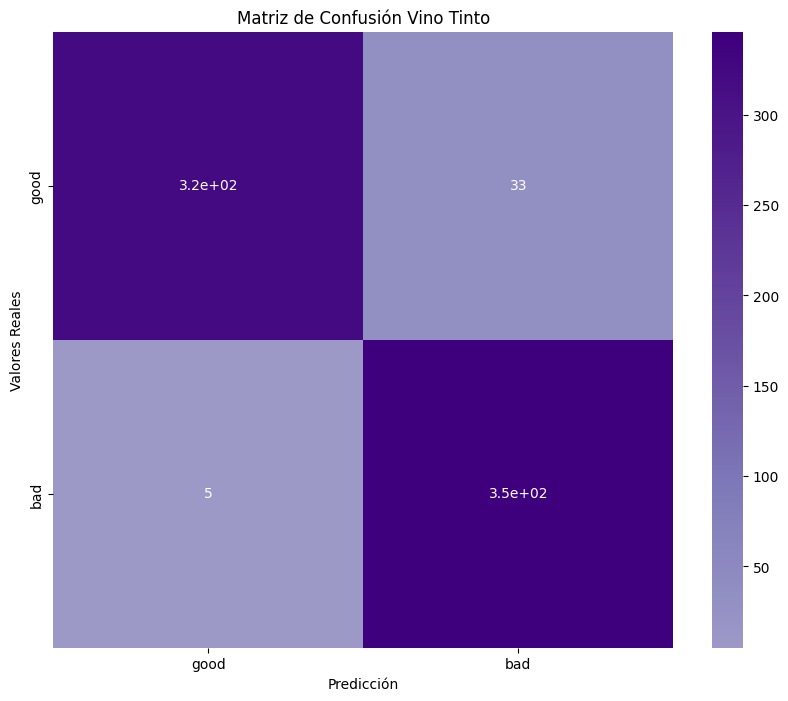

In [76]:
from matplotlib import pyplot as plt
import seaborn as sns

_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_knn_red,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks(), labels=["good", "bad"])
ax1.set_yticks(ticks=ax1.get_yticks(), labels=["good", "bad"])
ax1.set_title('KNN')
plt.title("Matriz de Confusión Vino Tinto")
plt.show()

In [77]:
y_pred_knn_white = knn_white.predict(X_test_white)

# Evaluar el modelo
accuracy_knn_white = accuracy_score(y_test_white, y_pred_knn_white)

print(f'Exactitud:accuracy_knn (Vino Blanco) {accuracy_knn_white}')
classification_report_knn_white = classification_report(y_test_white, y_pred_knn_white)
print('Informe de Clasificación:')
print(classification_report_knn_white)

# Matriz de Confusión
conf_matrix_knn_white = confusion_matrix(y_test_white, y_pred_knn_white)
print('Matriz de Confusión KNN (Vino Blanco):')
print(conf_matrix_knn_white)

Exactitud:accuracy_knn (Vino Blanco) 0.8985122210414452
Informe de Clasificación:
              precision    recall  f1-score   support

         bad       0.94      0.85      0.89       926
        good       0.86      0.95      0.90       956

    accuracy                           0.90      1882
   macro avg       0.90      0.90      0.90      1882
weighted avg       0.90      0.90      0.90      1882

Matriz de Confusión KNN (Vino Blanco):
[[784 142]
 [ 49 907]]


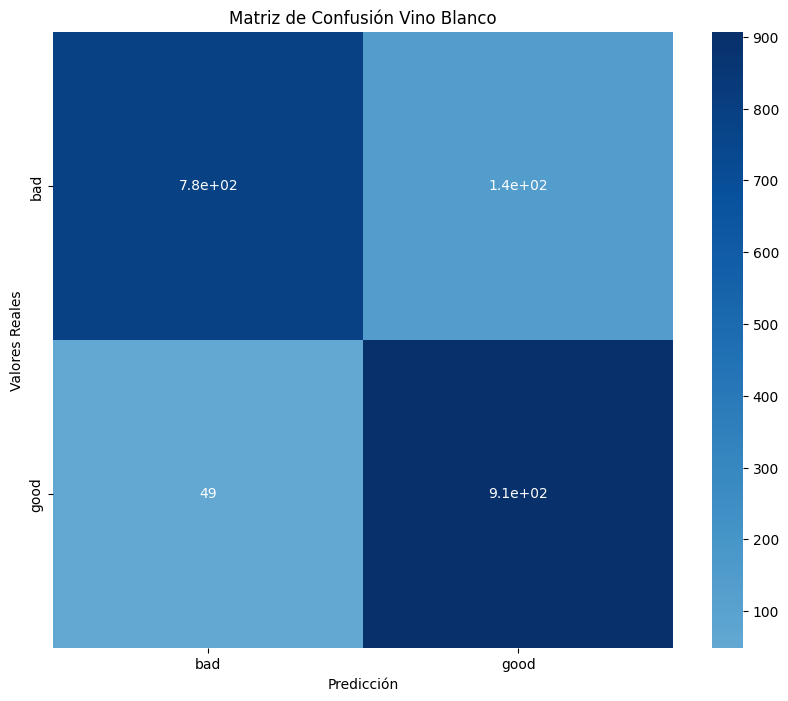

In [78]:
_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_knn_white,
    annot=True,
    cmap='Blues',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks(), labels=["bad", "good"])
ax1.set_yticks(ticks=ax1.get_yticks(), labels=["bad", "good"])
ax1.set_title('KNN')
plt.title("Matriz de Confusión Vino Blanco")
plt.show()

#### Evaluacion Modelo de regresion Logistica

In [79]:
# Realizar predicciones
y_pred_lr_red = lr_red.predict(X_test_red)

# Evaluar el modelo
accuracy_lr_cv_red = accuracy_score(y_test_red, y_pred_lr_red)

print(f'Exactitud:accuracy_lr_cv {accuracy_lr_cv_red}')
classification_report_lr_cv_red = classification_report(y_test_red, y_pred_lr_red)
print('Informe de Clasificación:')
print(classification_report_lr_cv_red)

# Matriz de Confusión
conf_matrix_lr_cv_red = confusion_matrix(y_test_red, y_pred_lr_red)
print('Matriz de Confusión Logistic Regression:')
print(conf_matrix_lr_cv_red)

Exactitud:accuracy_lr_cv 0.8184397163120567
Informe de Clasificación:
              precision    recall  f1-score   support

         bad       0.84      0.78      0.81       354
        good       0.80      0.85      0.82       351

    accuracy                           0.82       705
   macro avg       0.82      0.82      0.82       705
weighted avg       0.82      0.82      0.82       705

Matriz de Confusión Logistic Regression:
[[277  77]
 [ 51 300]]


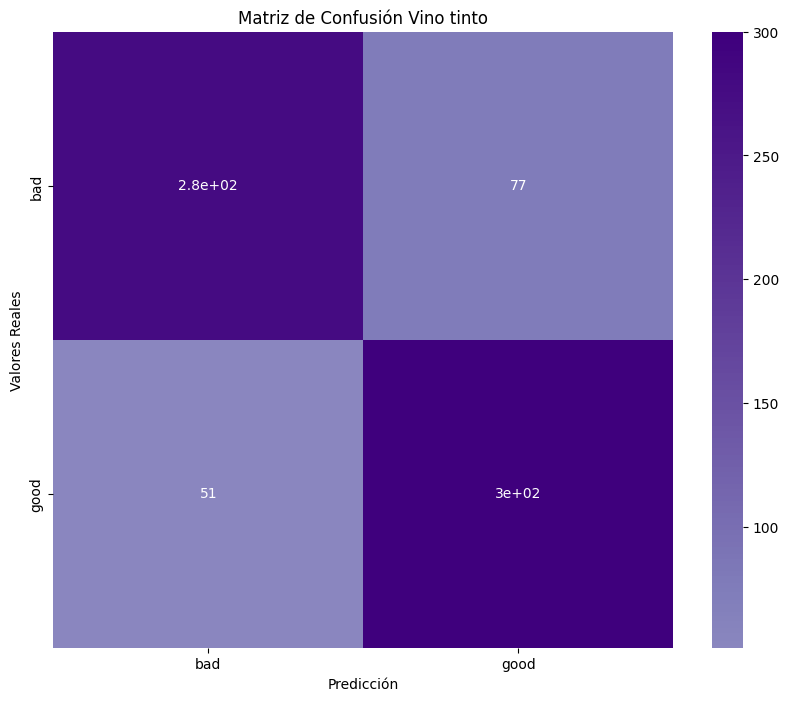

In [80]:
from matplotlib import pyplot as plt
import seaborn as sns

_, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_lr_cv_red,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax2,
)

ax2.set_xlabel("Predicción")
ax2.set_ylabel("Valores Reales")
ax2.set_xticks(ticks=ax2.get_xticks(), labels=["bad", "good"])
ax2.set_yticks(ticks=ax2.get_yticks(), labels=["bad", "good"])
ax2.set_title('Logistic Regression')
plt.title("Matriz de Confusión Vino tinto")
plt.show()

In [81]:
# Realizar predicciones
y_pred_lr_white = lr_white.predict(X_test_white)

# Evaluar el modelo
accuracy_lr_cv_white = accuracy_score(y_test_white, y_pred_lr_white)

print(f'Exactitud:accuracy_lr_cv {accuracy_lr_cv_white}')
classification_report_lr_cv_white = classification_report(y_test_white, y_pred_lr_white)
print('Informe de Clasificación:')
print(classification_report_lr_cv_white)

# Matriz de Confusión
conf_matrix_lr_cv_white = confusion_matrix(y_test_white, y_pred_lr_white)
print('Matriz de Confusión Logistic Regression:')
print(conf_matrix_lr_cv_white)

Exactitud:accuracy_lr_cv 0.7651434643995749
Informe de Clasificación:
              precision    recall  f1-score   support

         bad       0.78      0.72      0.75       926
        good       0.75      0.80      0.78       956

    accuracy                           0.77      1882
   macro avg       0.77      0.76      0.76      1882
weighted avg       0.77      0.77      0.76      1882

Matriz de Confusión Logistic Regression:
[[671 255]
 [187 769]]


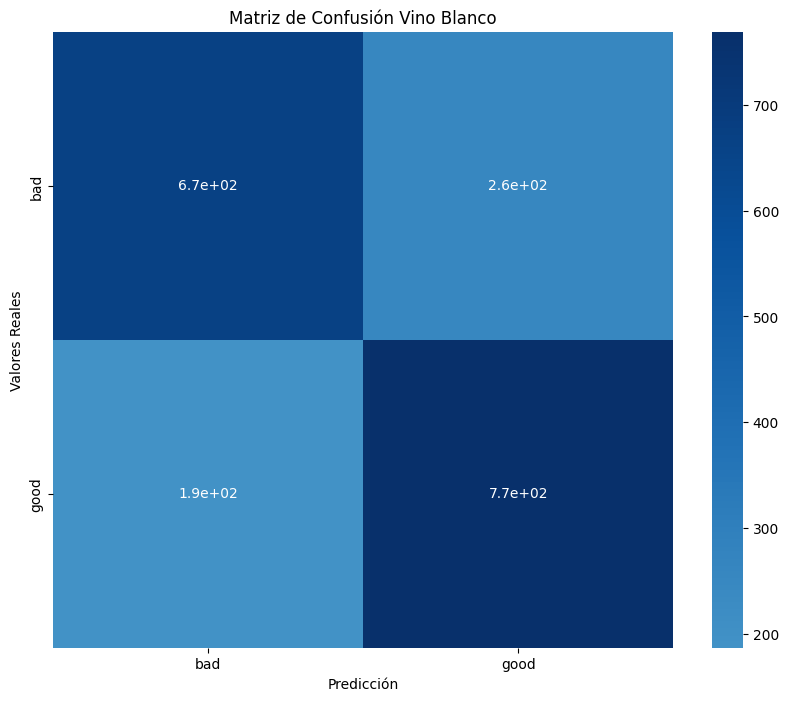

In [82]:
from matplotlib import pyplot as plt
import seaborn as sns

_, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_lr_cv_white,
    annot=True,
    cmap='Blues',
    center=0,
    ax=ax2,
)

ax2.set_xlabel("Predicción")
ax2.set_ylabel("Valores Reales")
ax2.set_xticks(ticks=ax2.get_xticks(), labels=["bad", "good"])
ax2.set_yticks(ticks=ax2.get_yticks(), labels=["bad", "good"])
ax2.set_title('Logistic Regression')
plt.title("Matriz de Confusión Vino Blanco")
plt.show()

Se observa que en el caso del vino blanco, la matriz confusion evidencia una respuesta no adecuada. Mas adelante compararemos con los demas mapas de calor para profundizar en este tema.

### Comparacion de rendimiento

#### Matriz confusion de los modelos

Comparamos las matrices confusion para evaluar el desempenho de los modelos para cada tipo de vino y para cada modelo (KNN Regresion logistica)

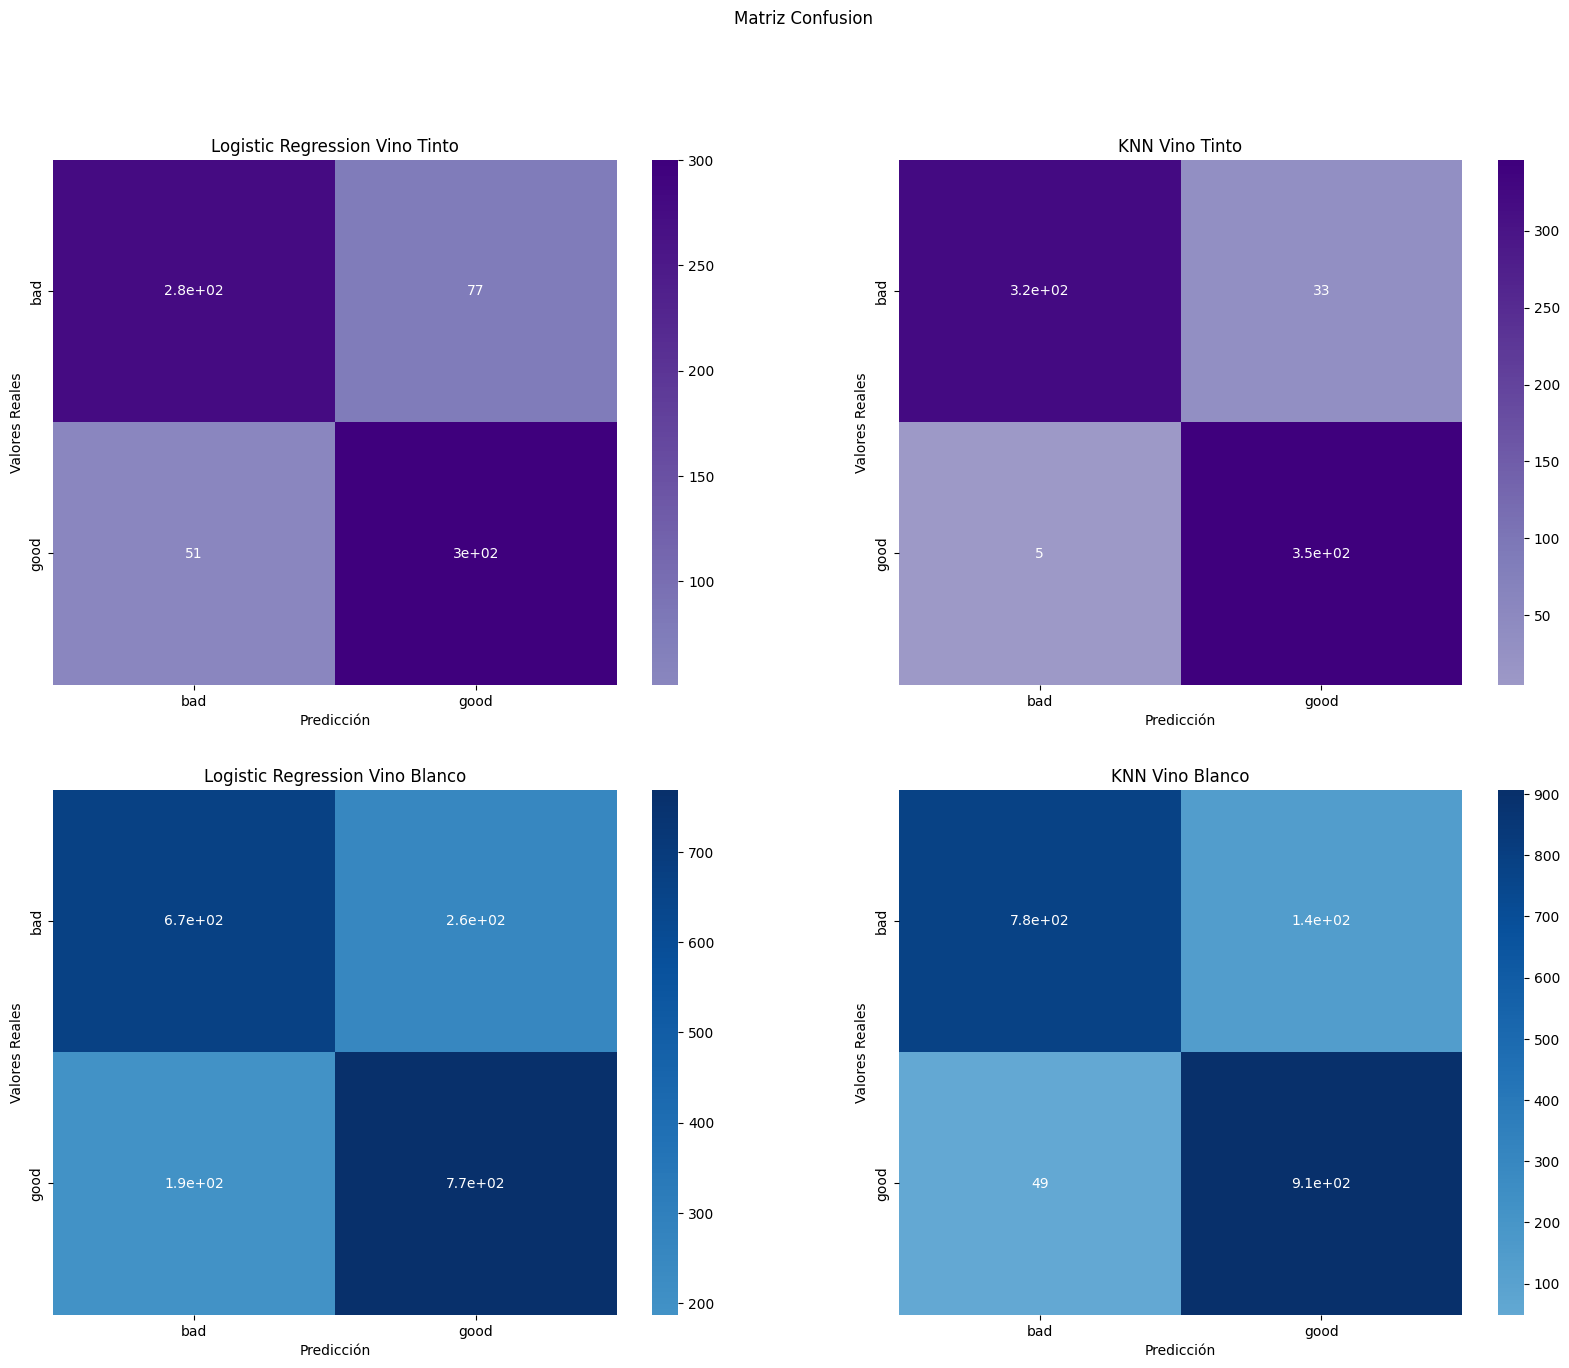

In [83]:
from matplotlib import pyplot as plt
import seaborn as sns

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax1, ax2, ax3, ax4= axes.flatten()
sns.heatmap(
    conf_matrix_lr_cv_red,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax1,
)
sns.heatmap(
    conf_matrix_knn_red,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax2,
)
sns.heatmap(
    conf_matrix_lr_cv_white,
    annot=True,
    cmap='Blues',
    center=0,
    ax=ax3,
)
sns.heatmap(
    conf_matrix_knn_white,
    annot=True,
    cmap='Blues',
    center=0,
    ax=ax4,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks(), labels=["bad", "good"])
ax1.set_yticks(ticks=ax1.get_yticks(), labels=["bad", "good"])
ax1.set_title('Logistic Regression Vino Tinto')
ax2.set_xlabel("Predicción")
ax2.set_ylabel("Valores Reales")
ax2.set_xticks(ticks=ax2.get_xticks(), labels=["bad", "good"])
ax2.set_yticks(ticks=ax2.get_yticks(), labels=["bad", "good"])
ax2.set_title('KNN Vino Tinto')
ax3.set_xlabel("Predicción")
ax3.set_ylabel("Valores Reales")
ax3.set_xticks(ticks=ax3.get_xticks(), labels=["bad", "good"])
ax3.set_yticks(ticks=ax3.get_yticks(), labels=["bad", "good"])
ax3.set_title('Logistic Regression Vino Blanco')
ax4.set_xlabel("Predicción")
ax4.set_ylabel("Valores Reales")
ax4.set_xticks(ticks=ax4.get_xticks(), labels=["bad", "good"])
ax4.set_yticks(ticks=ax4.get_yticks(), labels=["bad", "good"])
ax4.set_title('KNN Vino Blanco')
plt.suptitle('Matriz Confusion')
plt.show()

* Vino tinto
En el caso del vino tinto no existe una diferencia muy notable entre ambos, a simple viste se percibe un mejor rendimiento del modelo KNN, pero como veremos en el caso del vino tinto no es tan evidente.

* Vino Blanco
Observamos ambas matrices confusiones y vemos que para el caso de vinos blancos, existe un peor rendimiento. 
Utilizando la Regresion logistica con el vino blanco obtenemos una muy mala respuesta. Lo que sugiere que el metodo no es el adecuado.
En el caso de KNN para vino blanco, se observa una mejor respuesta, por lo anto el metodo de K-Nearest Neighborghs es mejor.



#### Evaluacion utilizando accuracy, presision, recall y F1-score

In [84]:
print('Accuracy Regresion Logistica Vino Tinto: {}'.format(accuracy_lr_cv_red)) 
print('Accuracy Regresion Logistica Vino Blanco: {}'.format(accuracy_lr_cv_white)) 
print('Accuracy KNN Vino Tinto: {}'.format(accuracy_knn_red))
print('Accuracy KNN Vino Blanco: {} \n'.format(accuracy_knn_white))
# El siguiente fragmento de codigo fue obtenido a traves de ChatGPT, 
# basicamente lo que hace es imprimir en 2 columnas, se utiliza solamente 
# para facil visualizacion de ambas tablas
table1 = classification_report_lr_cv_red
table2 = classification_report_knn_red
table3 = classification_report_lr_cv_white
table4 = classification_report_knn_white
table2 = "Modelo K-Nearest Neighbourghs Tinto\n" + table2[0:]
table1 = "Modelo Regresion Logistica Vino Tinto\n" + table1[0:]
table3 = "Modelo K-Nearest Neighbourghs Blanco\n" + table3[0:]
table4 = "Modelo Regresion Logistica Vino Blanco\n" + table4[0:]
# Split the tables into lines
lines1 = table1.split("\n")
lines2 = table2.split("\n")
lines3 = table3.split("\n")
lines4 = table4.split("\n")
# Pad the shorter list to match the length of the longer one
max_lines = max(len(lines1), len(lines2))
lines1.extend([""] * (max_lines - len(lines1)))
lines2.extend([""] * (max_lines - len(lines2)))
# Print the tables side by side
for line1, line2 in zip(lines1, lines2):
    print(f"{line1:<50} {"       "} {line2}")
max_lines = max(len(lines3), len(lines4))
lines3.extend([""] * (max_lines - len(lines3)))
lines4.extend([""] * (max_lines - len(lines4)))
for line3, line4 in zip(lines3, lines4):
    print(f"{line3:<50} {"       "} {line4}")

Accuracy Regresion Logistica Vino Tinto: 0.8184397163120567
Accuracy Regresion Logistica Vino Blanco: 0.7651434643995749
Accuracy KNN Vino Tinto: 0.9460992907801419
Accuracy KNN Vino Blanco: 0.8985122210414452 

Modelo Regresion Logistica Vino Tinto                      Modelo K-Nearest Neighbourghs Tinto
              precision    recall  f1-score   support                       precision    recall  f1-score   support
                                                           
         bad       0.84      0.78      0.81       354                  bad       0.98      0.91      0.94       354
        good       0.80      0.85      0.82       351                 good       0.91      0.99      0.95       351
                                                           
    accuracy                           0.82       705             accuracy                           0.95       705
   macro avg       0.82      0.82      0.82       705            macro avg       0.95      0.95      0.95    